In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Практическое задание

### В sklearn есть встроенные («игрушечные») наборы данных. Возьмём для примера один из них — load_boston(), в нём содержится информация о ценах на недвижимость в Бостоне.

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_boston

boston_data = load_boston()
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
import pandas as pd

Загрузим данные о признаках в "x", а целевые значения — в "y"

In [5]:
X = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
y = boston_data.target

Посмотрим основную информацию о датасете

In [6]:
# Первые 5 строк
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


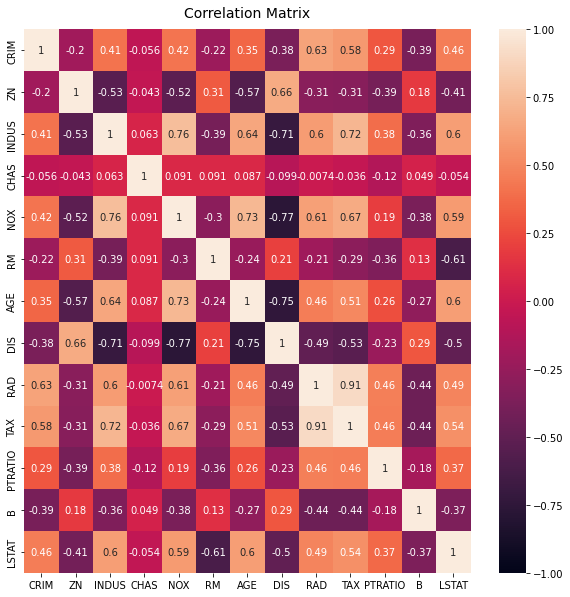

In [10]:
# строим тепловую карту матрицы корреляций
plt.figure(figsize=(10,10))
heatmap=sns.heatmap(X[:].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Matrix', fontdict={'fontsize':14}, pad=12);

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train.index

Int64Index([ 33, 283, 418, 502, 402, 368, 201, 310, 343, 230,
            ...
            228,   8,  73, 400, 118, 486, 189, 495, 206, 355],
           dtype='int64', length=404)

In [12]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
33,1.15172,0.0,8.14,0.0,0.538,5.701,95.0,3.7872,4.0,307.0,21.0,358.77,18.35
283,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16
418,73.53410,0.0,18.10,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
402,9.59571,0.0,18.10,0.0,0.693,6.404,100.0,1.6390,24.0,666.0,20.2,376.11,20.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,5.69175,0.0,18.10,0.0,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98
189,0.08370,45.0,3.44,0.0,0.437,7.185,38.9,4.5667,5.0,398.0,15.2,396.90,5.39
495,0.17899,0.0,9.69,0.0,0.585,5.670,28.8,2.7986,6.0,391.0,19.2,393.29,17.60
206,0.22969,0.0,10.59,0.0,0.489,6.326,52.5,4.3549,4.0,277.0,18.6,394.87,10.97


In [13]:
y_train

array([13.1, 50. ,  8.8, 20.6, 12.1, 50. , 24.1, 16.1, 23.9, 24.3, 13.1,
       30.3, 15.2, 13.8, 26.4, 16.6, 18.9, 17.6, 18.7, 33.4, 20.7, 17.1,
       23.4, 26.5, 21.4, 21.5, 19.2, 50. , 50. , 23. , 10.5, 17.8, 10.9,
       21. , 13.8, 10.5, 22.2, 30.5, 19.4, 15.6, 20.2, 19.3, 34.6, 50. ,
       24. , 18.7, 19.8, 22.5, 13.3, 50. , 11.8, 11. , 23.7, 35.4, 15.2,
       24.4, 33.4, 31.6, 13.4, 34.9, 14.4, 35.4, 25.3, 18.3, 16.6, 13.4,
       23.6, 27.5, 22.2, 17.7, 14.3, 21.7,  8.4, 15.3, 20.3, 32. , 20. ,
       19.1, 28.7, 46. , 22.6, 23.9, 21.9, 15.6, 50. , 25. , 37.9, 21.6,
       19.3, 17.5, 22.9, 15. , 27.5, 10.2, 23.8, 23.9, 20.1, 16.5, 33.1,
       14.6, 28.4, 23.7, 12.3, 31.5, 22. , 12.5, 35.1, 14.9, 22.9, 22.9,
       19.3, 19.8, 20. , 29.6, 20.5, 29. , 20.7, 19.9, 11.9,  5. , 23.3,
       20.6, 22.9, 19.6, 14.1, 30.8, 43.1, 19.9, 13.9, 22.3, 14.3, 23.9,
       16. , 20.5, 10.2, 20.1, 12.8, 18.9, 22. , 20.4, 17.5, 13.1, 22. ,
       45.4, 18.8, 20. , 20.1, 21.4, 17.4, 21.1, 28

## Обучить модель

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [15]:
model.fit(
    X_train,
    y_train
)

LinearRegression()

## Оценить точность модели на обучающей выборке и тестовой

In [16]:
pred_train = model.predict(
    X_train
)

In [17]:
pred_test = model.predict(
    X_test
)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Средняя квадратичная ошибка (MSE) модели на обучающей выборке {mean_squared_error(y_train, pred_train)}")
print(f"Средняя квадратичная ошибка (MSE) модели на тестовой выборке {mean_squared_error(y_test, pred_test)}")
print()
print(f"Коэффициент детерминации (R^2) модели на обучающей выборке {r2_score(y_train, pred_train)}")
print(f"Коэффициент детерминации (R^2) модели на тестовой выборке {r2_score(y_test, pred_test)}")

Средняя квадратичная ошибка (MSE) модели на обучающей выборке 22.477090408387625
Средняя квадратичная ошибка (MSE) модели на тестовой выборке 20.86929218377085

Коэффициент детерминации (R^2) модели на обучающей выборке 0.738339392059052
Коэффициент детерминации (R^2) модели на тестовой выборке 0.7334492147453071
